# Matrix = some column vectors

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def make_blobs(N=150, k=3, d=2, seed=None):
    """
    Input:
        N: an integer, number of samples
        k: an integer, number of blobs
        d: an integer, dimension of the space
    Output:
        a dataset X of shape (N, d)
    """
    np.random.seed(seed)
    X = np.random.randn(N,d)
    blob_size = N // k
    centers = np.random.randn(k, d) * 3
    for i in range(k):
        left = blob_size * i
        right = blob_size * (i+1) if i != k-1 else N
        X[left:right] += centers[i]
    return X

## Main idea

Let $S = \{{\bf u}_1, \ldots, {\bf u}_n\}$ be a collection of vectors.  
A **linear combination** of $S$ is a vector of the form  
$${\bf v} = c_1{\bf u}_1 + \cdots + c_n{\bf u}_n$$
where $c_1,\ldots,c_n$ are real numbers.  
The **span** of $S$, denoted by $\operatorname{span}(S)$, is the set of all linear combinations of $S$.

Let  
$$A = \begin{bmatrix} 
 | & ~ & | \\
 {\bf u}_1 & \cdots & {\bf u}_n \\
 | & ~ & | \\
\end{bmatrix}$$
be an $m\times n$ matrix.  Let 
$${\bf v} = \begin{bmatrix} c_1 \\ \vdots \\ c_n \end{bmatrix}$$
a vector in $\mathbb{R}^n$.  

Then  
$$A{\bf v} = c_1{\bf u}_1 + \cdots + c_n{\bf u}_n$$  
and  
$$\{A{\bf v}: {\bf v}\in\mathbb{R}^n\} = \operatorname{span}(\{{\bf u}_1, \ldots, {\bf u}_n\}),$$
which is called the **column space** $\operatorname{Col}(A)$ of $A$.

## Side stories

- space, column space
- `np.meshgrid`
- center of mass
- shift the data
- NumPy broadcasting

## Experiments

##### Exercise 1
Let 
```python
A = np.array([[1,-1], 
              [1,1]])
grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()
```

###### 1(a)
Plot the points ${\bf v}$ where the x,y-coordinates are stored in `xs` and `ys`, respectively.

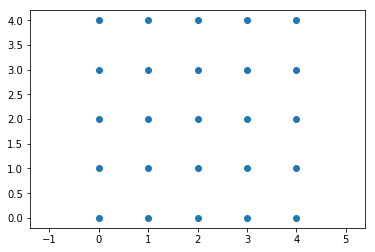

In [3]:
A = np.array([[1,-1],[1,1]])
grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()
plt.axis('equal')
plt.plot(xs,ys,'o')

###### 1(b)
Plot the points $A{\bf v}$ where the x,y-coordinates are stored in `xs` and `ys`, respectively.  
Hint:  You might need the function `np.vstack` .

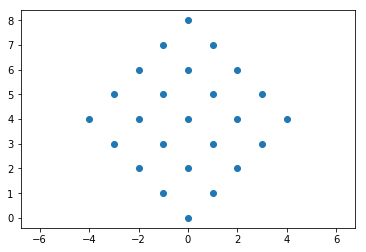

In [4]:
v = np.vstack((xs,ys))
Av = np.dot(A,v)
plt.axis('equal')
plt.plot(Av[0],Av[1],'o')

###### 1(c)
Draw the column vectors of $A$ on the figure that you drew earlier.

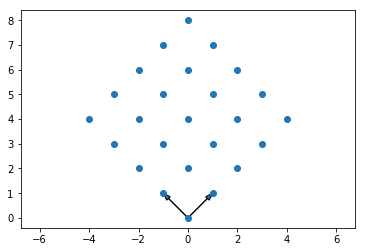

In [5]:
v = np.vstack((xs,ys))
Av = np.dot(A,v)
plt.axis('equal')
plt.plot(Av[0],Av[1],'o')
plt.arrow(0,0,1,1,head_width=0.2,length_includes_head = True)
plt.arrow(0,0,-1,1,head_width=0.2,length_includes_head = True)

##### Exercise 2
Let 
```python
A = np.array([[1,1,1],
              [-1,0,0],
              [0,-1,0]])
B = np.array([[1,1,0],
              [-1,0,1],
              [0,-1,-1]])
grid = np.meshgrid(np.arange(5), np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()
zs = grid[2].ravel()
```

###### 2(a)
Draw the grid using the columns of $A$ on the three dimensional space.  
Remeber you need the following to setup a 3d-axes.  
```python
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
```

<IPython.core.display.Javascript object>


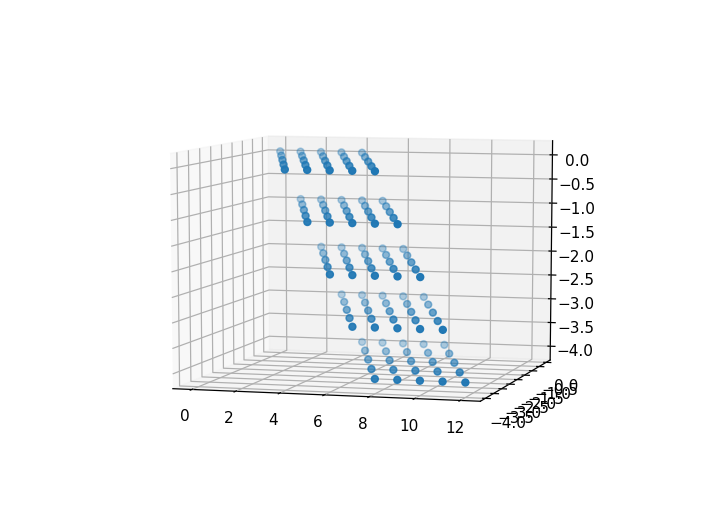

In [6]:
%matplotlib notebook
ax = plt.axes(projection='3d')

A = np.array([[1,1,1],
              [-1,0,0],
              [0,-1,0]])

grid = np.meshgrid(np.arange(5), np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()
zs = grid[2].ravel()

v = np.vstack((xs,ys,zs))
Av = np.dot(A,v)

ax.scatter(Av[0],Av[1],Av[2])

###### 2(b)
Draw the grid using the columns of $B$ on the three dimensional space.  
What's the main difference between (a) and (b)?

<IPython.core.display.Javascript object>


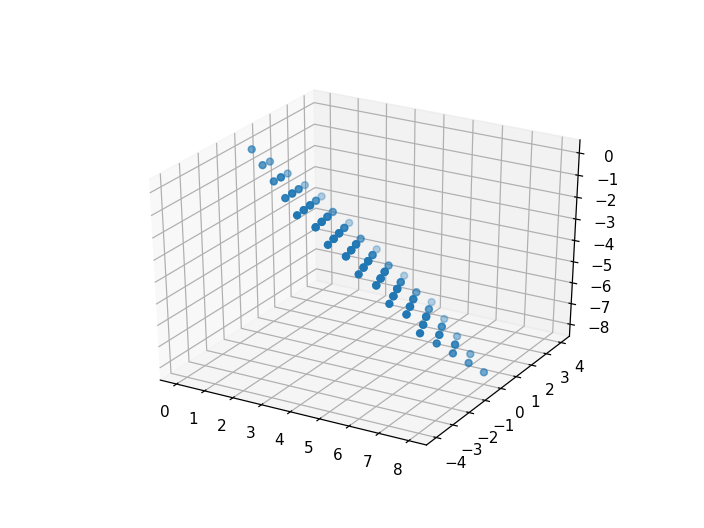

In [7]:
%matplotlib notebook
ax = plt.axes(projection='3d')

B = np.array([[1,1,0],
              [-1,0,1],
              [0,-1,-1]])

Bv = np.dot(B,v)
ax.scatter(Bv[0],Bv[1],Bv[2])

###### 2(c)
Let ${\bf u}_1, {\bf u}_2, {\bf u}_3$ be the column vectors of $A$.  
Draw the grid using $S = \{{\bf u}_1, {\bf u}_2\}$ and draw an arrow for ${\bf u}_3$.  
Is ${\bf u}_3$ in $\operatorname{span}(S)$?  
Hint:  You might need `np.quiver`.

<IPython.core.display.Javascript object>


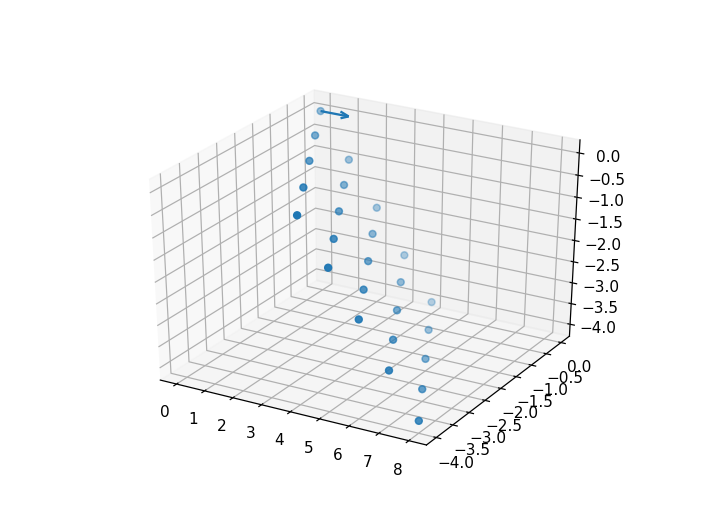

In [8]:
%matplotlib notebook
ax = plt.axes(projection='3d')

A = np.array([[1,1,1],
              [-1,0,0],
              [0,-1,0]])

new_A = np.array([[1,1],
                  [-1,0],
                  [0,-1]])

grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

v = np.vstack((xs,ys))
new_Av = np.dot(new_A,v)

ax.scatter(new_Av[0],new_Av[1],new_Av[2])
ax.quiver(0,0,0,A[0][2],A[1][2],A[2][2])

$𝐮_3$ is NOT in $span(𝑆)$!

## Exercises

##### Exercise 3
Let  
```python
x = np.array([0,1,2])
y = np.array([3,4,5])
```

###### 3(a)
Guess and understand the meaning of `x - y` .

In [9]:
x = np.array([0,1,2])
y = np.array([3,4,5])

x-y

array([-3, -3, -3])

###### 3(b)
Guess and understand the meaning of `x[:,np.newaxis] - y` .

In [10]:
print(x[:,np.newaxis])
x[:,np.newaxis] - y

[[0]
 [1]
 [2]]


array([[-3, -4, -5],
       [-2, -3, -4],
       [-1, -2, -3]])

###### 3(c)
Guess and understand the meaning of `x[:,np.newaxis] - y[np.newaxis,:]` .

In [11]:
print(x[:,np.newaxis],y[np.newaxis,:])
x[:,np.newaxis] - y[np.newaxis,:]

[[0]
 [1]
 [2]] [[3 4 5]]


array([[-3, -4, -5],
       [-2, -3, -4],
       [-1, -2, -3]])

###### 3(d)
Let  
```python
ys = np.arange(15).reshape(3,5)
```
Guess and understand the meaning of `x[:,np.newaxis] - ys` .

In [12]:
ys = np.arange(15).reshape(3,5)
x[:,np.newaxis] - ys

array([[  0,  -1,  -2,  -3,  -4],
       [ -4,  -5,  -6,  -7,  -8],
       [ -8,  -9, -10, -11, -12]])

##### Exercise 4
Let  
```python
A = np.array([[1,1],
              [-1,0],
              [0,-1]])
p = np.array([1,1,1])
grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys])
new_vs = A.dot(vs)
```

###### 4(a)
Draw a red point at the origin and an arrow for `p` .

<IPython.core.display.Javascript object>


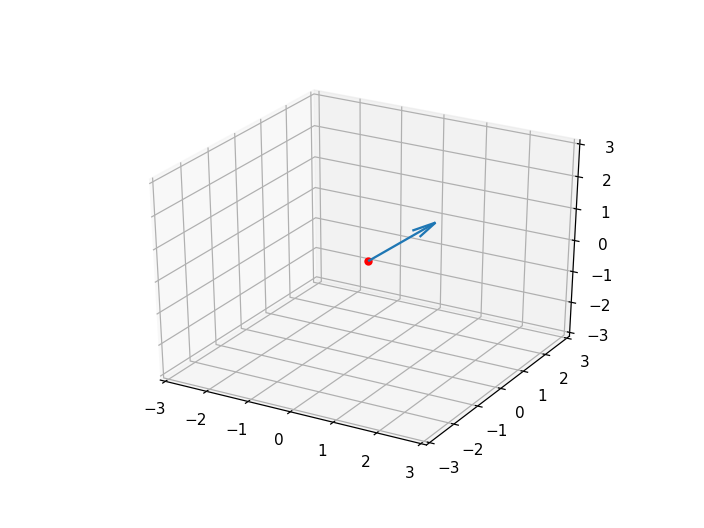

In [13]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

A = np.array([[1,1],
              [-1,0],
              [0,-1]])
p = np.array([1,1,1])
grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys])
new_vs = A.dot(vs)

ax.scatter(0,0,0,c='red')
ax.quiver(0,0,0,1,1,1)

###### 4(b)
Let `shifted_vs = p[:,np.newaxis] + new_vs` .  
What is the meaning of `shifted_vs` ?  
Draw the points (columns) in `shifted_vs` along with a red point at the oirign and an arrow for `p` .  

The meaning of `shifted_vs` is that shift `new_vs` in the `p` direction.

<IPython.core.display.Javascript object>


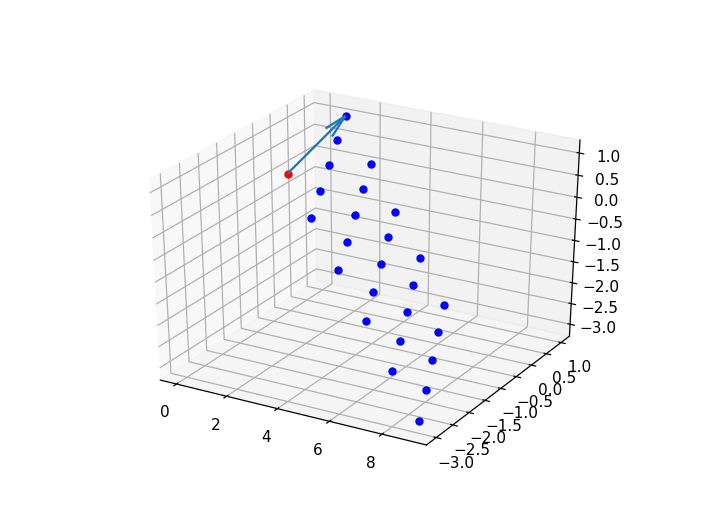

In [14]:
%matplotlib notebook
ax = plt.axes(projection='3d')

shifted_vs = p[:,np.newaxis] + new_vs

ax.scatter(0,0,0,c='red')
ax.quiver(0,0,0,1,1,1)

for i in range(len(shifted_vs[0])):
    ax.scatter(shifted_vs[0][i],shifted_vs[1][i],shifted_vs[2][i],c='blue')

##### Exercise 5
Let  
```python
A = np.array([[1,1],
              [-1,0],
              [0,-1]])
p = np.array([1,0,0])
grid = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys])
new_vs = A.dot(vs)
```

###### 5(a)
Calculate 
```python
diff = p[:,np.newaxis] - new_vs
dist = np.sqrt(np.sum(diff**2, axis=0))
```
and guess the meaning of `dist`.

In [15]:
a = np.array([[1,2,3],[1,2,3]])
np.sum(a,axis=1)

array([6, 6])

In [19]:
A = np.array([[1,1],
              [-1,0],
              [0,-1]])
p = np.array([1,0,0])
grid = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys])
new_vs = A.dot(vs)

diff = p[:,np.newaxis] - new_vs
dist = np.sqrt(np.sum(diff**2, axis=0))
dist

array([25.3179778 , 25.07102654, 24.82490669, ..., 23.1925021 ,
       23.43852497, 23.68543856])

The `dist` is the distance from the points in `new_vs` to `p`. 

###### 5(b)
Use `np.min` to find the shortest distance beteen `p` and a point in `new_vs` .  
Use `np.argmin` to find this point in `new_vs` .  
(This point is the project of `p` onto the column space of `A` .)

In [18]:
rmin=np.min(dist)
print(rmin)
m = np.argmin(dist)
new_vs[:,m]

0.5821022034029864


array([ 0.60606061, -0.3030303 , -0.3030303 ])

##### Exercise 6
Let `X = make_blobs(k=1)` .  

###### 6(a)
Draw a red point at the origin and the points (rows) in `X` .

<IPython.core.display.Javascript object>


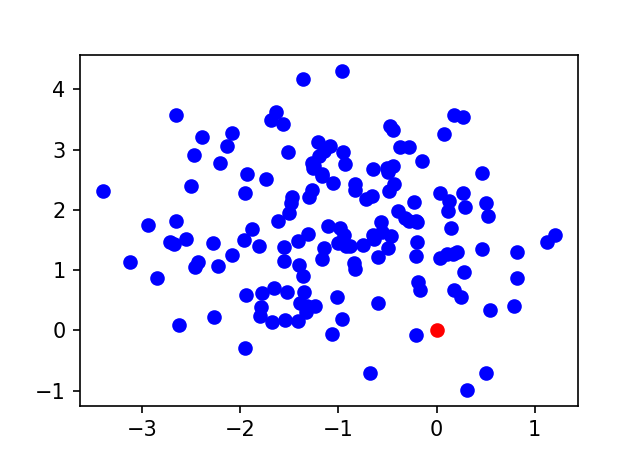

In [69]:
X = make_blobs(k=1)

plt.plot(0,0,'ro')
for i in range(150):
    plt.plot(X[i][0],X[i][1],'bo')

###### 6(b)
Suppose $\{{\bf x}_i\}_{i=1}^n$ are some points.  
Then the **center of mass** is at $\frac{1}{n}\sum_{i=1}^n {\bf x}_i$.  
Let $\{{\bf x}_i\}_i$ be the rows of `X` .  
Use `mu = X.mean( ... )` to find the center of mass.

In [75]:
mu = X.mean(axis=0)
mu

array([-0.99214597,  1.71883779])

###### 6(c)
Let `new_X = X - mu`.  
(Guess its meaning.)  
Draw a red point at the origin and the points (rows) in `new_X` .

<IPython.core.display.Javascript object>


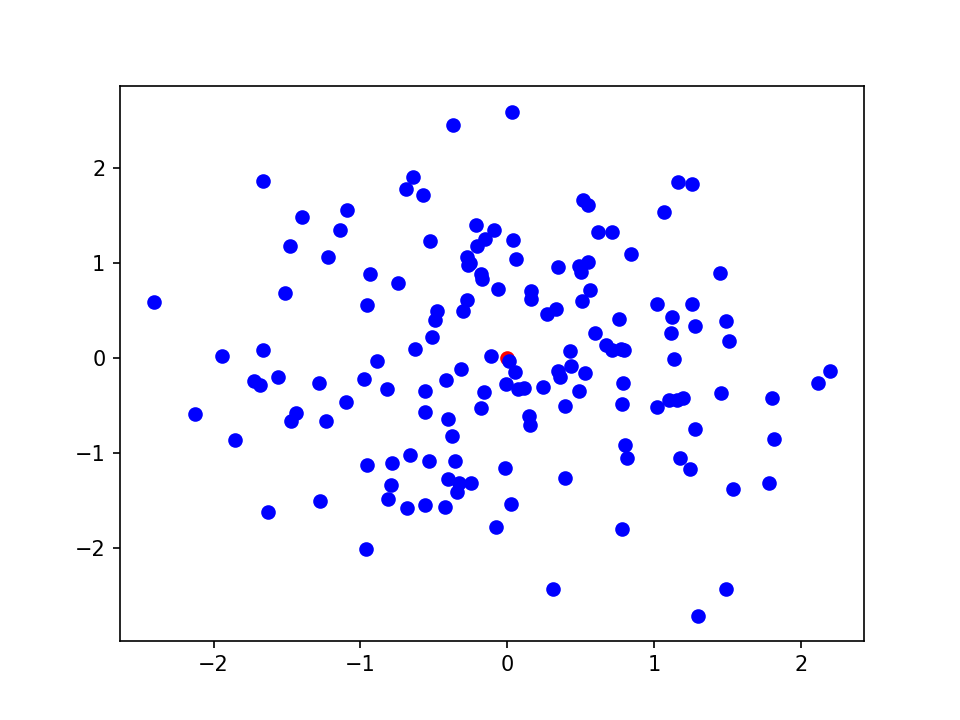

In [77]:
new_X = X - mu

plt.plot(0,0,'ro')
for i in range(150):
    plt.plot(new_X[i][0],new_X[i][1],'bo')

##### Exercise 7
For the following equality, pick some random matrices or vectors and check if the equality is true.

###### 7(a)
The **trace** of an $n\times n$ matrix $A=\begin{bmatrix}a_{ij}\end{bmatrix}$ is  
$$\operatorname{tr}(A) = a_{11} + a_{22} + \cdots + a_{nn}.$$  
For any $n\times n$ matrix $A=\begin{bmatrix}a_{ij}\end{bmatrix}$,  
$$\operatorname{tr}(A) = \sum_{i=1}^n\sum_{j=1}^n a_{ij}^2.$$

In [20]:
size = 10
a = np.random.randint(100, size=(size,size))
tr1 = 0
tr2 = 0

for i in range(size):
    tr1 = tr1 + a[i][i]
    
for i in range(size):
    for j in range(size):
        tr2 = tr2 + a[i][i]**2
    
print('matrix =')
print(a)
print('-----------------------')
print('tr1 =',tr1)
print('tr2 =',tr2)
print(tr1 == tr2)

matrix =
[[10 69  8 89 32 16  8 28 98 62]
 [ 2 61 51 59 62 40 95 64 51  5]
 [31 10 28  1 47 77 30 67 97  6]
 [88 43 12  2 21 12 80 40 68 33]
 [21 83 35 20 64 29 12 46 37  7]
 [72 86 32 90 22 15 54 13 59 30]
 [78 45 15  8 41 91 76 96 35 51]
 [52 80 96 41 71 92  1 99 99 42]
 [72 63 51 90 36 57 98 44 19 91]
 [38 43 31 38 69 56  7 30 98 27]]
-----------------------
tr1 = 401
tr2 = 255970
False


###### 7(b)
Let $A$ be an $m\times n$ matrix and $B$ an $n\times \ell$ matrix.  
Then $(AB)^\top = B^\top A^\top$.  

In [21]:
m = 3
n = 4
l = 5
A = np.random.randint(100, size=(m,n))
B = np.random.randint(100, size=(n,l))

lhs = np.dot(A,B).T
rhs = np.dot(B.T,A.T)

print('lhs =')
print(lhs)
print('-----------------------')
print('rhs =')
print(rhs)
print('-----------------------')
print(lhs == rhs)

lhs =
[[ 9399  9881 11417]
 [ 9857  9089 12405]
 [ 4300  4114  5646]
 [ 3523  3677  4201]
 [ 8486 11241  9334]]
-----------------------
rhs =
[[ 9399  9881 11417]
 [ 9857  9089 12405]
 [ 4300  4114  5646]
 [ 3523  3677  4201]
 [ 8486 11241  9334]]
-----------------------
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


###### 7(c)
Let $A$ be an $m\times n$ matrix, ${\bf x}\in\mathbb{R}^n$, ${\bf y}\in\mathbb{R}^m$.  
Then $\langle A{\bf x}, {\bf y}\rangle = {\bf y}^\top A{\bf x} = \langle {\bf x}, A^\top{\bf y}\rangle$.  

In [22]:
m = 5
n = 6
A = np.random.randint(100, size=(m,n))
x = np.random.randint(100, size=(n,1))
y = np.random.randint(100, size=(m,1))

Ax = np.dot(A,x)

a = (Ax*y).sum()
b = np.dot(y.T,Ax)[0][0]
c = (x*(np.dot(A.T,y))).sum()

print(a == b, b == c)

True True
